In [247]:
# importing the modules that will be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adding Data

## Adding First Data Source

For my first data source, I used [The Weather Scraper](https://github.com/Karlheinzniebuhr/the-weather-scraper) to downloads weather data from the weather stations near my house.

In [248]:
# reading in data from local csv using pandas read_csv function
full_weather_df = pd.read_csv('KKYFORTT2.csv')

# displaying the top 5 rows of the newly created data frame to ensure it was loaded correctly. 
full_weather_df.head()

,Date,Time,Temperature_F,Dew_Point_F,Humidity_%,Wind,Speed_mph,Gust_mph,Pressure_in,Precip_Rate_in,Precip_Accum_in,UV,Solar_w/m2
0,1/1/2022,12:04 AM,63.5,61.2,92,WNW,4.8,6.9,30.14,0.00,0.00,0,0.0
1,1/1/2022,12:09 AM,63.4,61.2,93,WNW,3.9,6.1,30.14,0.00,0.00,0,0.0
2,1/1/2022,12:14 AM,63.1,61.1,94,WNW,2.8,4.5,30.14,0.05,0.01,0,0.0
3,1/1/2022,12:19 AM,62.9,60.9,94,WSW,3.5,5.1,30.14,0.05,0.01,0,0.0
4,1/1/2022,12:24 AM,62.6,60.6,94,West,2.9,4.6,30.14,0.05,0.01,0,0.0


In [249]:
# applying groupby() function to group the data by day and take the mean of the measurements I am intersted in for this project. 
daily_weather_df = full_weather_df.groupby('Date', as_index=False)["Temperature_F", "Humidity_%", "Pressure_in", "Precip_Rate_in", "UV"].mean()

daily_weather_df.head()

C:\Users\rebec\AppData\Local\Temp\ipykernel_53216\136343739.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_weather_df = full_weather_df.groupby('Date', as_index=False)["Temperature_F", "Humidity_%", "Pressure_in", "Precip_Rate_in", "UV"].mean()


,Date,Temperature_F,Humidity_%,Pressure_in,Precip_Rate_in,UV
0,1/1/2022,55.932292,98.729167,30.077917,0.083819,0.000000
1,1/10/2022,23.358885,69.257840,30.852404,0.000000,0.407666
2,1/11/2022,23.203819,67.003472,30.858021,0.000000,0.520833
3,1/12/2022,39.423958,61.263889,30.513194,0.000000,0.520833
4,1/13/2022,40.048264,76.260417,30.284583,0.000000,0.298611


In [250]:
# converting the UV index colum from a float to an int
daily_weather_df.UV = daily_weather_df.UV.astype(int)

In [251]:
# Finally, I am going to make sure I have data for each day of the year
pd.date_range(start= '2022/01/01', end = "2022/12/31").difference(daily_weather_df.index)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [252]:
daily_weather_df.dtypes

Date               object
Temperature_F     float64
Humidity_%        float64
Pressure_in       float64
Precip_Rate_in    float64
UV                  int32
dtype: object

## Adding the Second Dataset

For my second dataset, I exported a year's worth of activity data from my fitbit. 

In [253]:
# reading in a local excel document using the panads read_excel function
fitbit_df = pd.read_excel('Fitbit_Data.xlsx', sheet_name="Activity")

fitbit_df.head()
# displaying the top 5 rows of the newly created data frame to ensure it was loaded correctly. 

,Date,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
0,2022-01-01,1982,2093,0.94,0,682,131,0,0,448
1,2022-01-02,2237,5612,2.52,1,684,231,0,0,818
2,2022-01-03,2286,7615,3.59,9,741,168,37,8,824
3,2022-01-04,2018,2639,1.19,1,955,140,0,0,487
4,2022-01-05,2018,2697,1.21,1,669,156,0,0,512


# Cleaning the Data
## Cleaning the First Dataset

In [254]:
# converting the columns from floats to ints using a for loop

cols = ["Temperature_F", "Humidity_%", "Pressure_in", "Precip_Rate_in", "UV"]
for x in cols:
    daily_weather_df[x] = daily_weather_df[x].apply(np.int64)

daily_weather_df.head()

,Date,Temperature_F,Humidity_%,Pressure_in,Precip_Rate_in,UV
0,1/1/2022,55,98,30,0,0
1,1/10/2022,23,69,30,0,0
2,1/11/2022,23,67,30,0,0
3,1/12/2022,39,61,30,0,0
4,1/13/2022,40,76,30,0,0


In [255]:
# Changing the Date column as a date type
daily_weather_df['Date'] = pd.to_datetime(daily_weather_df['Date'])

In [256]:
# renaming a column to be more specific
daily_weather_df.rename(columns={"UV": "UV_Index"}, inplace=True)

daily_weather_df.head()

,Date,Temperature_F,Humidity_%,Pressure_in,Precip_Rate_in,UV_Index
0,2022-01-01,55,98,30,0,0
1,2022-01-10,23,69,30,0,0
2,2022-01-11,23,67,30,0,0
3,2022-01-12,39,61,30,0,0
4,2022-01-13,40,76,30,0,0


## Cleaning the Second Dataset

First, I will find days where I have very little or no activity recorded. Since these are days where I forgot to wear my fitbit, I will drop them from my data.

In [257]:
# Dropping days with low step counts
fitbit_df.drop(fitbit_df[fitbit_df.Steps < 1000].index, inplace=True)

In [258]:
# Finally, I will convert the columns to ints

cols = ['Calories_Burned',
 'Steps',
 'Floors',
 'Minutes_Sedentary',
 'Minutes_Lightly_Active',
 'Minutes_Fairly_Active',
 'Minutes_Very_Active',
 'Activity_Calories']

for x in cols:
    fitbit_df = fitbit_df.astype({x : 'int'})

# Merging the Datasets

In [259]:
merged_df = pd.merge(daily_weather_df, fitbit_df, how='inner')

# sorting by date
merged_df = merged_df.sort_values(by=['Date'])


# Anaylsis

First, I want to find the days where I took the most steps and was the most active.

In [260]:
# Finding the max and min steps
max_steps = (merged_df['Steps'].max())
max_activity = (merged_df['Minutes_Very_Active'].max())

# Finding the days that correspond with the max and min steps
most_steps_day = merged_df.loc[merged_df['Steps'] == max_steps, 'Date'].iloc[0]
most_steps_day = most_steps_day.strftime('%B %d, %Y')
most_steps_day_temp = merged_df.loc[merged_df['Steps'] == max_steps, 'Temperature_F'].iloc[0]
most_active_day = merged_df.loc[merged_df['Minutes_Very_Active'] == max_activity, 'Date'].iloc[0]
most_active_day = most_active_day.strftime('%B %d, %Y')
most_active_day_temp = merged_df.loc[merged_df['Minutes_Very_Active'] == max_activity, 'Temperature_F'].iloc[0]

print (f"I was took the most steps on {most_steps_day}. The mean tempature that day was {most_steps_day_temp}. I was most active on {most_active_day} and the mean tempature that day was {most_active_day_temp}.")

I was took the most steps on July 27, 2022. The mean tempature that day was 73. I was most active on August 12, 2022 and the mean tempature that day was 69.


In [261]:
sorted_steps = merged_df.sort_values(by='Steps', ascending=False)
sorted_steps.head(10)

,Date,Temperature_F,Humidity_%,Pressure_in,Precip_Rate_in,UV_Index,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
234,2022-07-27,73,95,30,0,0,3139,17935,8.04,53,723,402,30,24,1923
236,2022-07-29,75,78,30,0,1,3264,17432,7.84,50,670,367,29,23,1985
194,2022-05-04,56,89,30,0,0,2905,16974,7.60,45,563,302,21,22,1601
235,2022-07-28,78,84,30,0,2,3152,16285,7.29,42,562,462,0,0,1930
275,2022-09-14,68,85,30,0,1,3044,15725,7.03,35,805,326,34,30,1718
183,2022-05-02,60,70,30,0,1,2902,14937,6.73,39,652,253,33,44,1536
173,2022-05-01,69,66,30,0,2,2905,14160,6.34,61,624,324,21,34,1626
274,2022-09-13,65,80,30,0,1,3100,11962,5.38,40,570,385,28,4,1797
283,2022-09-23,58,71,30,0,1,2759,11919,5.27,73,657,241,22,36,1356
34,2022-10-13,56,71,30,0,1,2857,11808,5.31,66,568,389,0,0,1571


# Visualization 

First I will look to see if there is a correlation between the mean tempature and the number of steps I took.

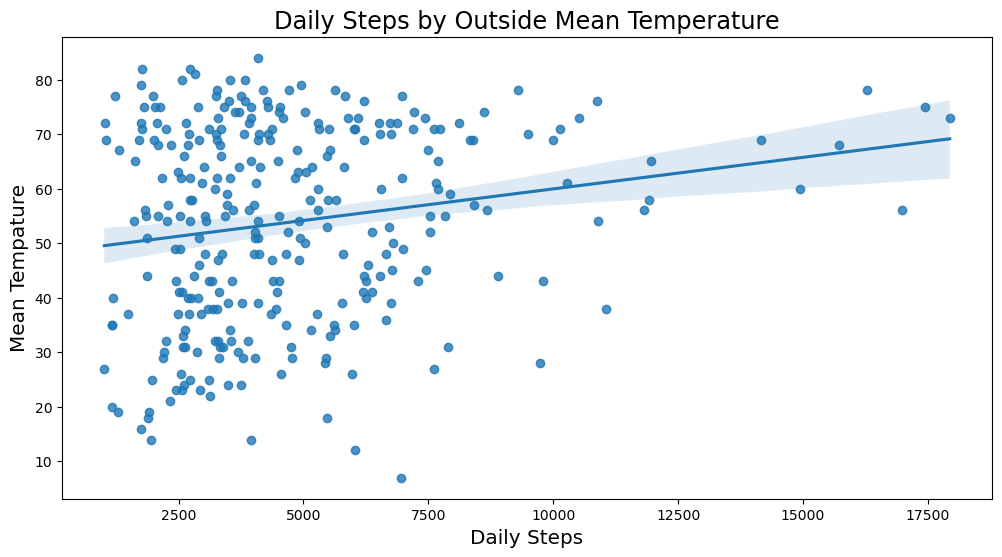

In [262]:
plt.figure(figsize=(12,6))
sns.regplot(data=merged_df, x='Steps', y='Temperature_F')
plt.title("Daily Steps by Outside Mean Temperature", fontsize='xx-large')
plt.xlabel('Daily Steps', fontsize='x-large')
plt.ylabel('Mean Tempature', fontsize='x-large')
plt.show()

The majority of days where my step count was above 10,000 occured when the mean tempature was above 50. 

In addition to looking at steps, I want to see if there are any patterns between my active minutes and a day's tempature.

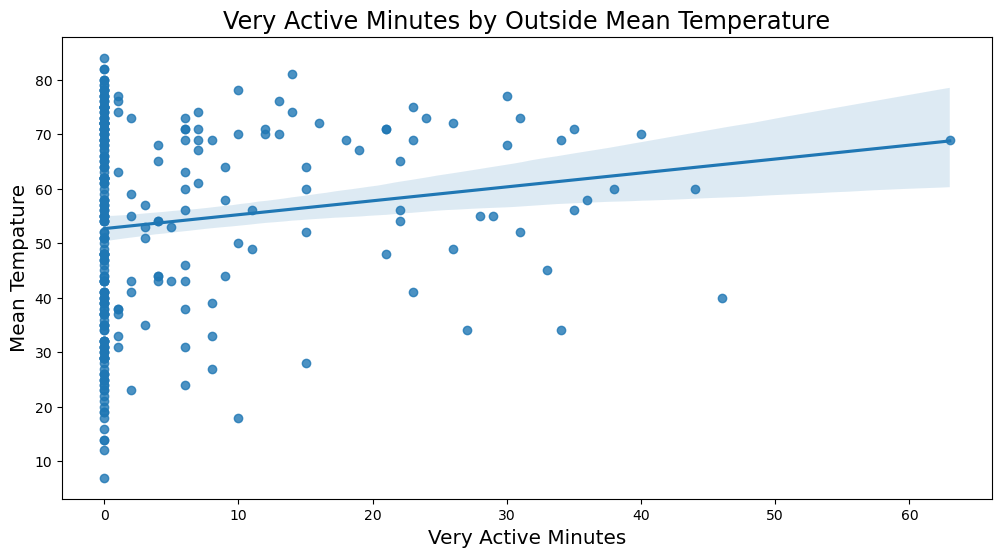

In [263]:
plt.figure(figsize=(12,6))
sns.regplot(data=merged_df, x='Minutes_Very_Active', y='Temperature_F')
plt.title("Very Active Minutes by Outside Mean Temperature", fontsize='xx-large')
plt.xlabel('Very Active Minutes', fontsize='x-large')
plt.ylabel('Mean Tempature', fontsize='x-large')
plt.show()

To continue to visualize my data in Tableau, I am going to export my merged dataset as a csv that I can use in Tableau.

In [264]:
merged_df.to_csv("merged_data.csv")

# Tableau Dashboard

More visualizations can be viewed on the [Tableau Dashboard](https://public.tableau.com/app/profile/rebecca.vachon/viz/WeatherEffectsDashboard/Story1?publish=yes/)